<a href="https://colab.research.google.com/github/betty6you/Jing_INFO5731_Spring2020/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [1]:
#Write your code here.
import pandas as pd
data=pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
print(data.shape)
data.head()

(413840, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


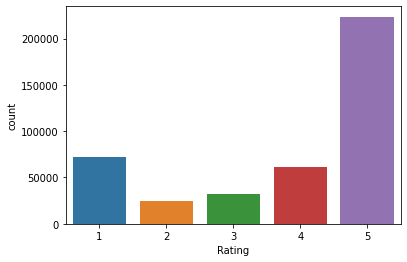

In [2]:
import seaborn as sns
sns.countplot(data.Rating)

In [3]:
#converting the Numerical reviws to categorical reviews on codition above 3 are
#positive and below 3 are negative as reviews rating with 3 are not much useful
#for analysis
#changing reviews with score less than 3 to be negative
import pandas as pd
df=pd.DataFrame(data)
df
df['PosNeg'] = df['Rating'].apply(lambda x: 'Negative' if x < 3 else 'Postive')
df.head(100)
df["PosNeg"].value_counts()

Postive     316762
Negative     97078
Name: PosNeg, dtype: int64

In [4]:
df.dropna(subset = ["Reviews"], inplace=True) # delete empty rows
df["PosNeg"].value_counts()

Postive     316717
Negative     97061
Name: PosNeg, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


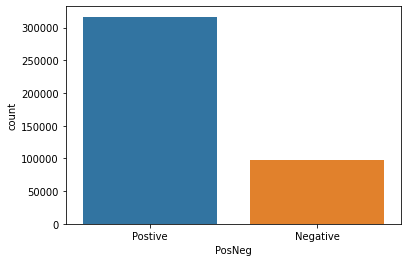

In [5]:
import seaborn as sns
sns.countplot(df.PosNeg)

In [6]:
# find sentences containing HTML tags
import re
i=0;
for sent in df['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

4646
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))
import re

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=' '
for sent in df['Reviews'].values:
    filtered_sentence=[]
    #print(sent)
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (df['PosNeg'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(df['PosNeg'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1
df['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
df['CleanedText']=df['CleanedText'].str.decode("utf-8")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,PosNeg,CleanedText
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Postive,feel lucki found use phone use hard phone line...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Postive,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Postive,pleas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Postive,work good goe slow sometim good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Postive,great phone replac lost phone thing volum butt...


In [10]:
df.shape

(413778, 8)

In [11]:
# clustering
# k means use bag-of-word
# generating bag-of-word features
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df['CleanedText'].values)
bow.shape

(413778, 46647)

In [12]:
bow

<413778x46647 sparse matrix of type '<class 'numpy.int64'>'
	with 6777098 stored elements in Compressed Sparse Row format>

In [16]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KeyboardInterrupt: ignored

In [15]:
labels = model.labels_
cluster_center=model.cluster_centers_
cluster_center

AttributeError: ignored

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

In [ ]:
df = final
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

In [ ]:
df.groupby(['Bow Clus Label'])['Text'].count()

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
# Clustering DBSCAN
from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append(compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)
dfdb = df
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)


In [ ]:
dfdb.groupby(['AVG-W2V Clus Label'])['Id'].count()

In [ ]:
#Clustering Hierarchical
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)


In [ ]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Text'].count()

In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Text'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Text'])
    print('\n')
    print("_" * 70)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
#You can write you answer here.
print(
    '''FOR TFIDF K means is best for identification than K MEANS for BOW, all the clusters are clearly refelcting they were grouped based on the categories/products. However, K means did best on the cluster centers top terms but however when we caopare reviews , few places it is not correalting.

DBSCAN is very poorly performining on the 10k columns as it is grouping all reviews in one cluster

Hierarchical, for BOW and TFIDF, we cannot identify the clusters and not divded unevenly, but for avg word to vectors all are grouped and divided evenly. It is very difficult to identify the type of reveiws based on Hirarchial formation. (PLEASE NOTE HIERARCHICAL IS TAKING SO MUCH TIME TO PROCESS, Please if any one would like to see the hierarchical , please upvote and i will send the jupyter notebook) Thank you''')